___
# PROJETO 1

## <font color='red'>SABRINA SAMPAIO SIMÃO</font>
___

## <font color='blue'>Recursos Tecnológicos Modernos: Como os aposentados os usam?</font>

## Introdução

É notável o surgimento de tecnologias revolucionárias na última decada. O telefone foi revolucionado, a internet surgiu e mudou muito rápido. Os celulares tijolos viraram computadores de bolso! Como será que a população de aposentados lidou com tantas mudanças? Podem ter tempo, mas será que tem o conhecimento e recursos necessários para desfrutar do século XXI?

Uma boa fonte que discute isso é http://www.iinterativa.com.br/infografico-aposentados-tecnologia-como-idosos-estao-usando-tecnologia-para-complementar-aposentadoria/

Muitos aspectos podem ser comparados entre esta pesquisa e a do site, uma delas sendo a grande quantidade de aposentados que trabalham e usam recursos tecnológicos. Justifica-se que é o mercado de trabalho que faz os aposentados se virarem para esta realidade nova antes não muito importante.

Contudo, um fator discutível do site é como eles tratam todos os aposentados como sendo idosos e vice versa. Isto nem sempre é realidade. Além disso, a base dos muitos infográficos deles são alteradas para causar mais impacto na notícia, distorcendo a realidade de fato. É um tanto manipulativo falar que 98% dos idosos que tem smartphones usam aplicativos neles, sendo que, do total de aposentados, muito poucos tem smartphones.

___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\sabri\Documents\GitHub\CD\Projeto-1


In [3]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""
#estrutura = pd.read_table("pes_py.txt", sep=";")

'Vamos ler a estrutura da PNAD como um dataframe.\n    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato\n    como uma base de tamanho fixo'

In [4]:
#estrutura.head()

In [287]:
# Usando o método de arquivo mais leve do Prof. Fabio!
dados = pd.read_csv("dados_limpos.csv")


In [328]:
#dados.head()

In [22]:
#estrutura.columns

In [23]:
#dados.columns = estrutura.Coluna

In [327]:
#dados.head()

In [326]:
#dados

In [288]:
dados.V0302 = dados.V0302.astype('category')
dados.V0302.cat.categories= ('Masculino', 'Feminino')

dados.V6007 = dados.V6007.astype('category')
dados.V6007.cat.categories=('primario','medio 1ciclo', 'medio 2ciclo', 'Fundamental', 'Ensino Medio', 'Fund JA', 'EM JA', 
                            'Superior', 'Mestrado', 'Alfabet. JA', 'Creche','CA','Maternal')

dados.V9122 = dados.V9122.astype('category')
dados.V9122.cat.categories= ('Aposentado', 'Não_Aposentado')

dados.V06111 = dados.V06111.astype('category')
dados.V06111.cat.categories= ('Sim', 'Não')

dados.V061112 = dados.V061112.astype('category')
dados.V061112.cat.categories= ('Tem PC', 'Não Tem PC')

dados.V061113 = dados.V061113.astype('category')
dados.V061113.cat.categories= ('Internet_Cel', 'Sem_internet')

dados.V061114 = dados.V061114.astype('category')
dados.V061114.cat.categories= ('Sim', 'Não')

dados.V06112 = dados.V06112.astype('category')
dados.V06112.cat.categories= ('Tem Celular', 'Não Tem Celular')

dados.V9001 = dados.V9001.astype('category')
dados.V9001.cat.categories= ('Trabalha', 'Não_Trabalha')

uf = dados.UF
idade = dados.V8005
sex = dados.V0302
cor = dados.V0404
formacao = dados.V6007
estado_civil = dados.V4011
trabalha = dados.V9001
aposentado = dados.V9122
internet = dados.V06111
computador = dados.V061112
i_celular = dados.V061113
tablet = dados.V061114
i_tv = dados.V061115
i_outro = dados.V061116
celular = dados.V06112
renda = dados[(dados.V1252 != 999999999999) & (dados.V1252 < 25000)].V1252
idade_trabalho = dados.V9892

### Vamos começar analisando os aposentados por sexo. Como se diferem a respeito da tecnologia atual?

In [262]:
#ap_formacao = pd.crosstab(aposentado, [formacao, sex,])
#ap_formacao

In [263]:
#ap_formacaoCut = ap_formacao.iloc[:,8:18]
#ap_formacaoCut

In [202]:
#ap_formacaoCut.plot.bar(color=('yellow', 'salmon', 'blue', 'red', 'green'), stacked=False, figsize=(10,10))

In [164]:
y = dados[(dados.V9122 == "Aposentado")].V9122
#Nao quero trabalhar com os nao aposentados, portanto criei esta nova variaveis y

In [270]:
ap_c = pd.crosstab(aposentado, [sex, celular])
ap_c

V0302            Masculino                    Feminino                
V06112         Tem Celular Não Tem Celular Tem Celular Não Tem Celular
V9122                                                                 
Aposentado           11605            7410       11676            7952
Não_Aposentado      105085           25781      116763           25489

### Ter celular é algo igual para ambos sexos, mas o acesso a internet no aparelho requer mais disposição a tecnologia, e tem mais do sexo feminino nesse aspecto

In [267]:
ap_formacao = pd.crosstab(aposentado, [sex, i_celular])
ap_formacao

V0302             Masculino                  Feminino             
V061113        Internet_Cel Sem_internet Internet_Cel Sem_internet
V9122                                                             
Aposentado             1739         2125         1902         1959
Não_Aposentado        59514        20110        66325        21235

In [33]:
ap_formacao = pd.crosstab(aposentado, [sex, tablet])
ap_formacao

V0302          Masculino        Feminino       
V061114              Sim    Não      Sim    Não
V9122                                          
Aposentado           591   3273      674   3187
Não Aposentado     11905  67719    13894  73666

In [106]:
ap_trabalha = pd.crosstab(trabalha, [aposentado,sex])
ap_trabalha2 = ap_trabalha.iloc[:,:]
ap_trabalha2

V9122        Aposentado          Não_Aposentado         
V0302         Masculino Feminino      Masculino Feminino
V9001                                                   
Trabalha           5194     3060          92046    68260
Não_Trabalha      13821    16568          38820    73992

### Mas será que o sexo feminino usa mais celulares na terceira idade por outros fatores, como... trabalhar?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000288833749B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000288835E5A90>], dtype=object)

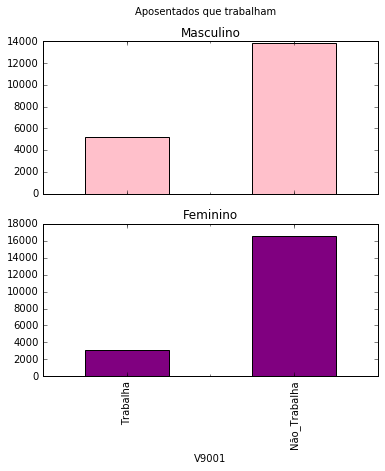

In [161]:
ap_trabalha.Aposentado.plot(kind='bar', color=('pink', 'purple'),legend=False, subplots=True, figsize=(6,6),
                           title="Aposentados que trabalham")

### Devemos, portanto, analisar o uso de celular (internet e outros afins tecnologicos) entre aposentados que NAO trabalham separados dos QUE trabalham, pois há uma divergência visto que 12% a mais de homens trabalham na aposentadoria

In [147]:
ap_1 = pd.crosstab(aposentado, [trabalha, i_celular, sex])
ap_2 = ap_1.iloc[:1,:]
ap_2

V9001          Trabalha                                Não_Trabalha           \
V061113    Internet_Cel          Sem_internet          Internet_Cel            
V0302         Masculino Feminino    Masculino Feminino    Masculino Feminino   
V9122                                                                          
Aposentado          713      593          765      492         1026     1309   

V9001                             
V061113    Sem_internet           
V0302         Masculino Feminino  
V9122                             
Aposentado         1360     1467

## Duas informações importantes são extraidas dessa tabela:
   
   1 - Entre mulheres e homens aposentados, mulheres usam mais o recurso tecnologico (como internet no ceular) 
       
   2 - Entre mulheres e homens aposentados QUE trabalham, a frequencia de uso de recurso tecnologico aumenta para ambos sexos
    
As conclusões disso e todo o resto serão reservadas para a parte final

#### Mostrarei visualmente essa conclusão nos gráficos de pizza a seguir

In [148]:
ap_1 = pd.crosstab(i_celular, [sex,y,trabalha])
ap_H = ap_1.iloc[:,:2]
ap_M = ap_1.iloc[:,4:6]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000288821D63C8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002888222D320>], dtype=object)

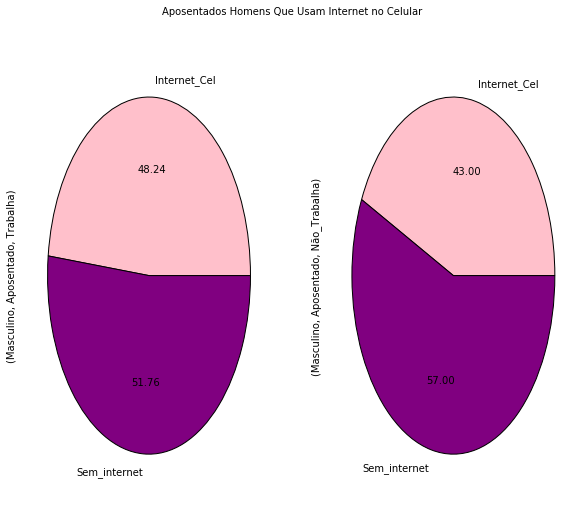

In [145]:
ap_H.plot(kind='pie', colors=('pink', 'purple'), autopct="%0.2f",legend=False, subplots=True, figsize=(10,8),
                           title="Aposentados Homens Que Usam Internet no Celular")


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028880D2FA90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002888248BFD0>], dtype=object)

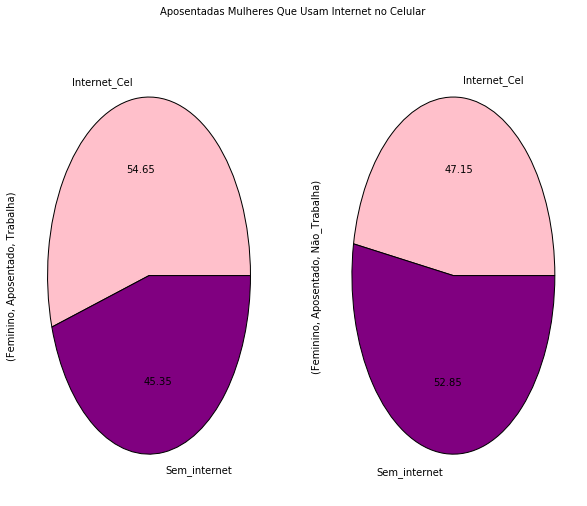

In [149]:
ap_M.plot(kind='pie', colors=('pink', 'purple'), autopct="%0.2f",legend=False, subplots=True, figsize=(10,8),
                           title="Aposentadas Mulheres Que Usam Internet no Celular")

In [150]:
ap_1 = pd.crosstab(tablet, [sex,y,trabalha])
ap_H = ap_1.iloc[:,:2]
ap_M = ap_1.iloc[:,4:6]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028882626828>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002888279BD68>], dtype=object)

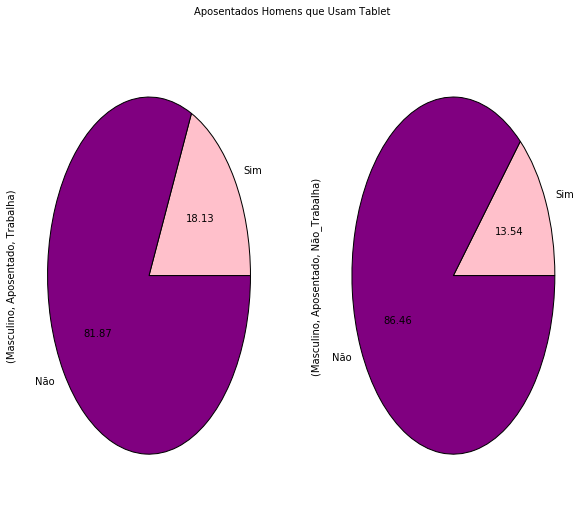

In [151]:
ap_H.plot(kind='pie', colors=('pink', 'purple'), autopct="%0.2f",legend=False, subplots=True, figsize=(10,8),
                           title="Aposentados Homens que Usam Tablet")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002888263B400>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002888298E588>], dtype=object)

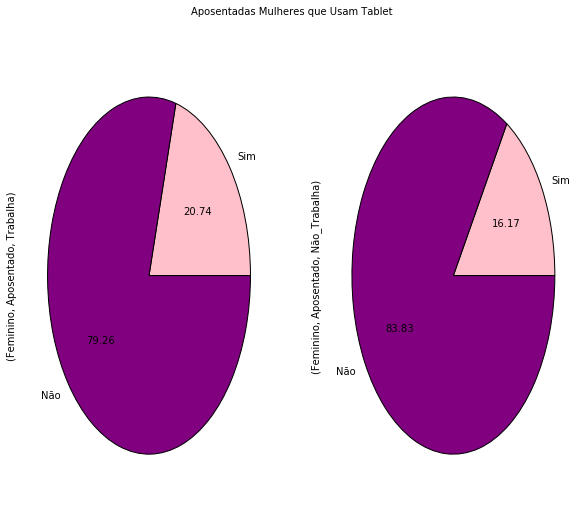

In [152]:
ap_M.plot(kind='pie', colors=('pink', 'purple'), autopct="%0.2f",legend=False, subplots=True, figsize=(10,8),
                           title="Aposentadas Mulheres que Usam Tablet")

### Novamente, as mulheres superam os homens em uso de recursos tecnologicos. E, novamente, os que trabalham usam MAIS do que os que não trabalham.

In [177]:
ap_1 = pd.crosstab(computador, [sex,y,trabalha])
ap_H = ap_1.iloc[:,:2]
ap_M = ap_1.iloc[:,4:6]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028885CA8CF8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000028885D85748>], dtype=object)

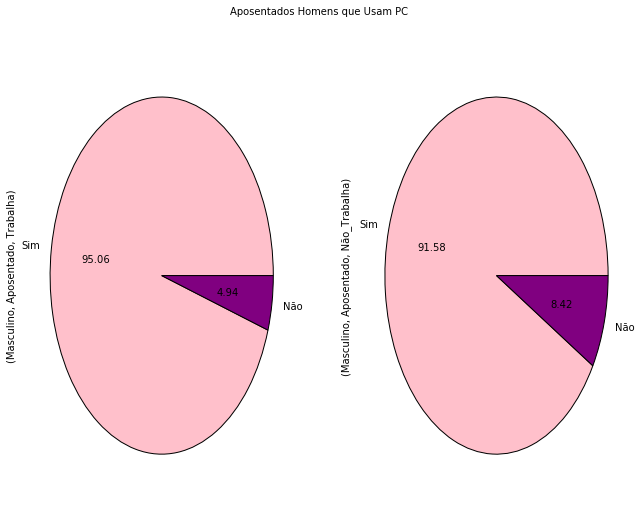

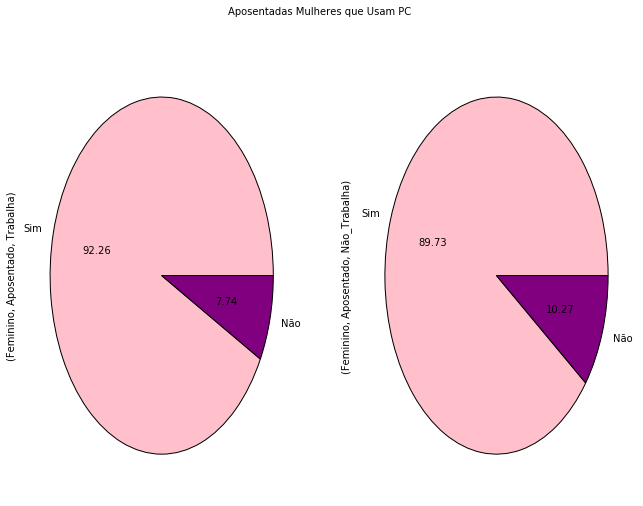

In [184]:
ap_H.plot(kind='pie',  autopct="%0.2f",colors=('pink', 'purple'),legend=False, subplots=True, figsize=(11,8),
                           title="Aposentados Homens que Usam PC")
ap_M.plot(kind='pie', autopct="%0.2f", colors=('pink', 'purple'),legend=False, subplots=True, figsize=(11,8),
                           title="Aposentadas Mulheres que Usam PC")

#### Finalmente! Esta variável é a primeira que indica uma prevalência do grupo masculino de aposentados em um aspecto tecnológico. A discussão se dará apenas no final para não estragar a surpresa.

#### Chega de sexos. Vamos analisar um pouco pela renda, pois ela pode nos indicar fatores interessantes.

[50, 22000, 0, 35000]

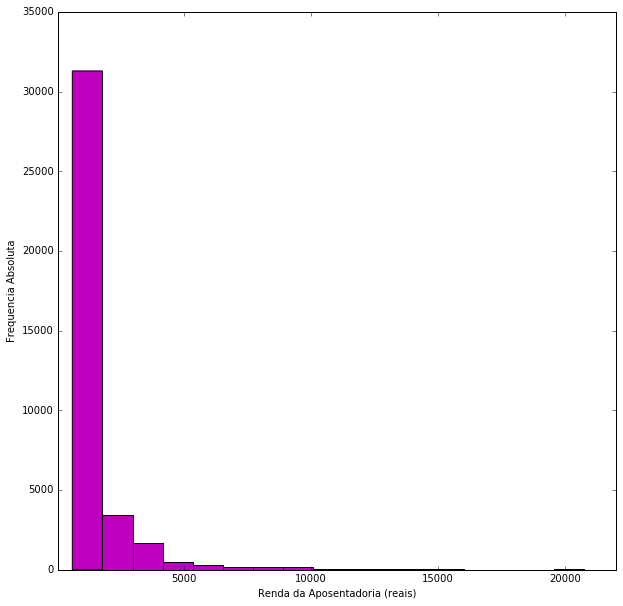

In [245]:
renda.plot.hist(stacked=False, bins=20, figsize=(10,10), color=('m'))
plt.ylabel("Frequencia Absoluta")
plt.xlabel("Renda da Aposentadoria (reais)")
plt.axis([50,22000,0,35000])

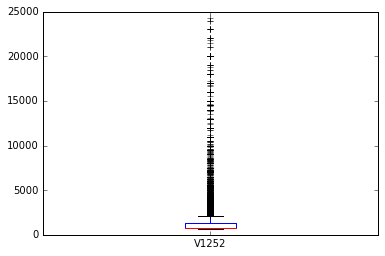

In [234]:
renda.plot.box()

### É fato que a aposentadoria no Brasil não é nenhum agrado, percebe-se que a majoritaria parte dos aposentados ganha uma renda de até 5000 reais, sendo raríssimo ganhar mais que isso.
#### Para facilitar a analise das rendas mais baixas, iremos ignorar os poucos aposentados fora da curva que ganham valores imensos, como 20 mil reais.

In [255]:
renda2 = dados[(dados.V1252 != 999999999999) & (dados.V1252 < 5000)].V1252

### Percebe-se, no histograma de todas as rendas de aposentadoria, uma barra muito maior que as outras, seria bom achar o valor exato onde se encontram tantas pessoas!

[600, 1000, 0, 35000]

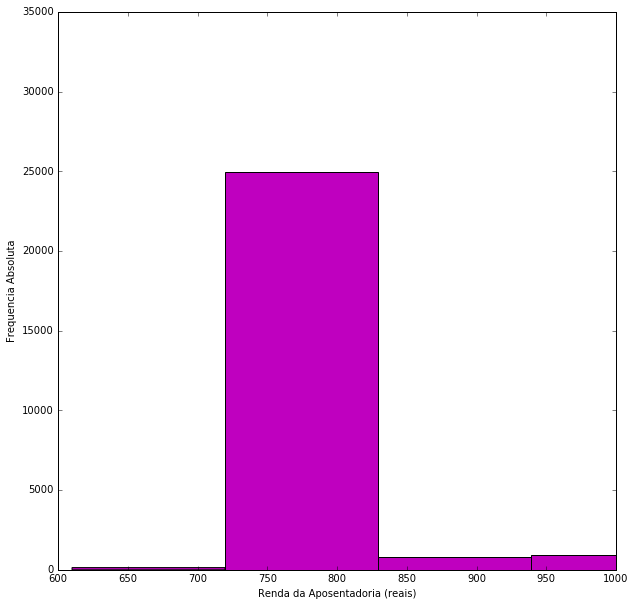

In [261]:
renda2.plot.hist(stacked=False, bins=40, figsize=(10,10), color=('m'))
plt.ylabel("Frequencia Absoluta")
plt.xlabel("Renda da Aposentadoria (reais)")
plt.axis([600,1000,0,35000])

### Portanto, a <i>grande maioria</i> da população de aposentados ganha aproximadamente 750 reais POR MÊS. É improvável que os mesmos aposentados sejam os que usam internet em tablets, celulares e computadores. Dessa forma, nossa última analise será a respeito da renda de tais aposentados e sua interação com recursos tecnológicos.

[0, 70, 0, 30000]

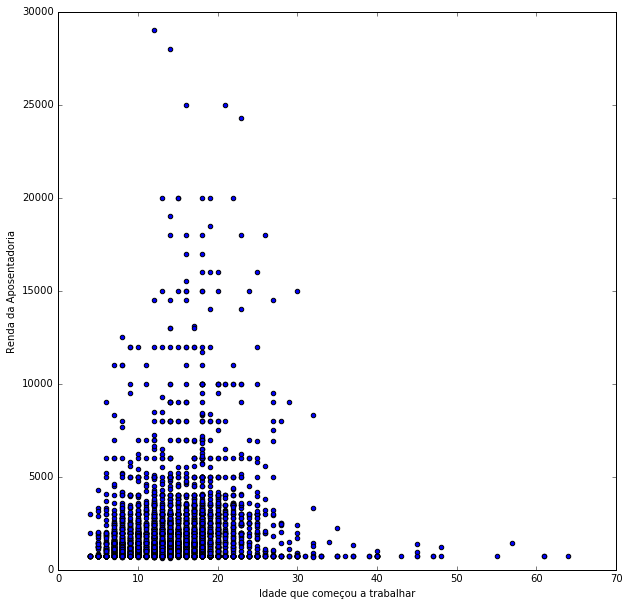

In [306]:
dispersao = dados[(dados.V1252 != 999999999999)].plot(kind="scatter", color='Blue', x="V9892", y="V1252",
                                                      figsize=(10,10))
plt.ylabel("Renda da Aposentadoria")
plt.xlabel("Idade que começou a trabalhar")
plt.axis([0,70,0,30000])

[0, 7000, 0, 70]

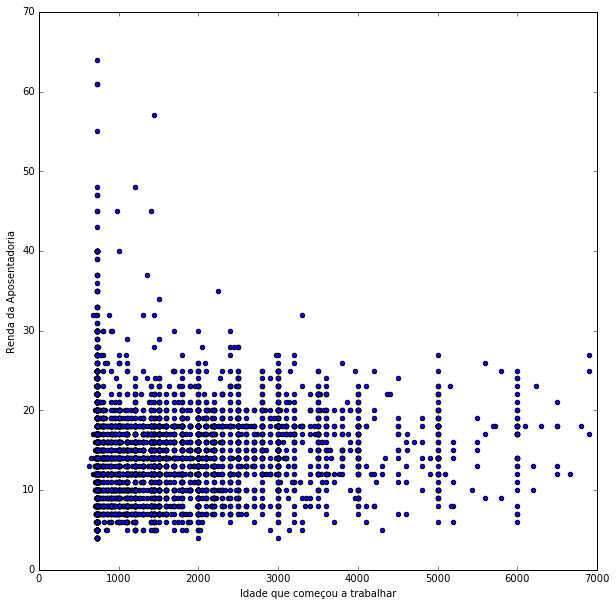

In [307]:
dispersao = dados[((dados.V1252 != 999999999999) & (dados.V1252 < 7000))].plot(kind="scatter", color='Blue', y="V9892", x="V1252",
                                                      figsize=(10,10))
plt.ylabel("Renda da Aposentadoria")
plt.xlabel("Idade que começou a trabalhar")
plt.axis([0,7000,0,70])

### Acima vimos que a renda dos aposentados tem "certa" relação com a idade em que começou a trabalhar, pois quem começou a trabalhar muito tarde tem baixa renda. Contudo, só apos os 30 anos isso começa a fazer diferença, pois antes dos 30 muitas pessoas conseguem rendas altíssimas e baixíssimas, não apresendando relação concreta.

#### <font color='purple'> Agora vamos ver o que queríamos, a renda da aposentadoria afeta tamém o uso de recursos tecnológicos? </font>

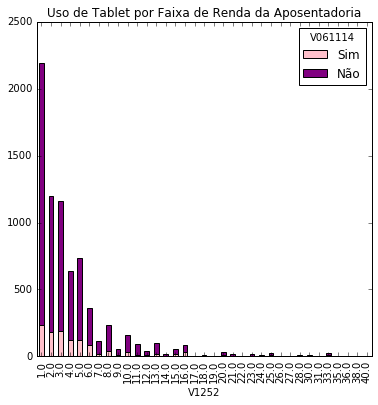

In [325]:
rmd = renda
renda_cel = pd.crosstab(rmd//600, tablet)
renda_cel
renda_cel.plot.bar(title="Uso de Tablet por Faixa de Renda da Aposentadoria",color=('pink', 'purple'), stacked=True, figsize=(6,6))

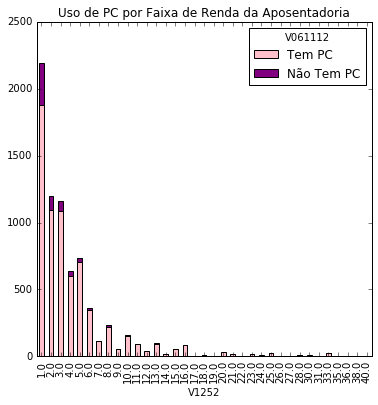

In [324]:
rmd = renda
renda_cel = pd.crosstab(rmd//600, computador)
renda_cel
renda_cel.plot.bar(title="Uso de PC por Faixa de Renda da Aposentadoria",color=('pink', 'purple'), stacked=True, figsize=(6,6))

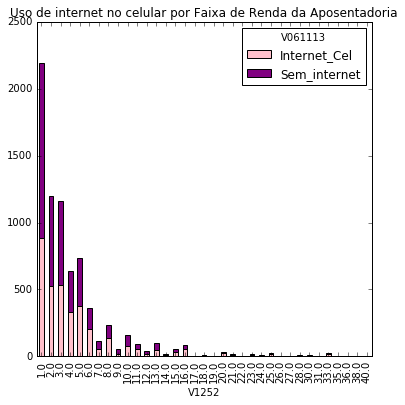

In [323]:
rmd = renda
renda_cel = pd.crosstab(rmd//600, i_celular)
renda_cel
renda_cel.plot.bar(title="Uso de internet no celular por Faixa de Renda da Aposentadoria",color=('pink', 'purple'), stacked=True, figsize=(6,6))

### <font color='purple'> Bom, aparentemente computadores são bem vindos nas baixas rendas de aposentados. Já Tablets estão fora por enquanto. Ter internet no celular é um luxo que metade dos aposentados já conseguiram conquistar!</font>

___

___
## Conclusão 

Muitos fatores foram observados nessa análise, e os aposentados tem um apego interessante para aprender a usar os recursos tecnológicos disponíveis nessa sociedade. A renda pode atrapalhar um pouco, pois muitos já possuem computadores pessoais, mas ainda não avançaram no mundo dos Tablets. Computadores são, de fato, mais próximos da realidade dos idosos do que tablets e celulares.
Curiosamente, homens preferem usar computadores, e usam bem mais que mulheres aposentadas. Já elas, tendem a aprender mais sobre tais tecnologias novas e demonstram mais frequencia no uso de Tables e internet em celulares (o que mostra adaptação com smartphones!). Show pras vovós!
Visto que a aposentadoria média é de valor ridículo, aproximadamente 750 reais, é compreensível que poucos aposentados gastem dinheiro com qualquer coisa que não seja de necessidade básica. Isso é mais comprovado pelo fato de que os aposentados que trabalham usam mais tais tecnologias, ou seja, o dinheiro extra é necessário para ter uma vida com laser e a aposentadoria fornecida pela previdência social é limitante.

Para quem diz que aposentados não fazem nada e são sustentados pelo Estado, provamos o contrário. Ganham pouquíssimo no geral, muitos ainda trabalham e tem apego pela tecnologia do século XXI como qualquer um!